# Complete Classification Machine Learning

# Step 1: Import Modules

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle
warnings.filterwarnings('ignore')
# from sklearn.linear_model import LinearRegression
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, confusion_matrix, precision_score, accuracy_score, \
mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
print('All Modules Loaded Successfully!!')

All Modules Loaded Successfully!!


# Step 2: Load Dataset

In [5]:
# Wine, Iris, tennis
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shreyakatukuri/tennis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\salma\.cache\kagglehub\datasets\shreyakatukuri\tennis\versions\1


In [6]:
file_name = os.listdir(path)[0]

file_path = path + '\\' + file_name

df_tennis = pd.read_csv(file_path)


In [7]:
iris = load_iris()
wine = load_wine()

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
iris_df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_df['Target'] = iris['target']
iris_target_names = iris['target_names']

print(iris_target_names)

['setosa' 'versicolor' 'virginica']


In [10]:
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

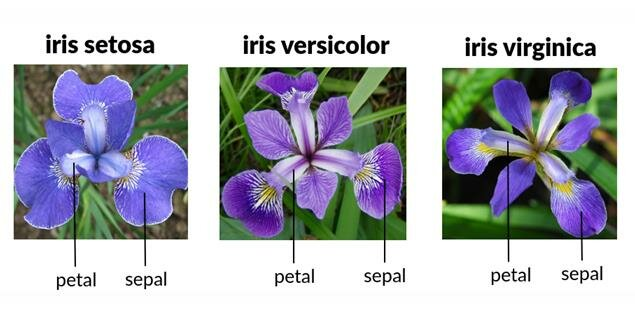

In [12]:
wine_df = pd.DataFrame(wine['data'],columns=wine['feature_names'])
wine_df['Target'] = wine['target']
wine_target_names = wine['target_names']

print(wine_target_names)

['class_0' 'class_1' 'class_2']


In [13]:
wine_df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  Target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

In [14]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [15]:
df_tennis

outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no

# Step 3: EDA

#### Step 3.1 Describe()

In [18]:
iris_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      Target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [19]:
wine_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           Target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [20]:
df_tennis.describe()

outlook  temp humidity  windy play
count       14    14       14     14   14
unique       3     3        2      2    2
top      sunny  mild     high  False  yes
freq         5     6        7      8    9

#### Step 3.2 Null Values

In [22]:
df_tennis.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [23]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [24]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Target                          0
dtype: int64

In [25]:
# NO null values Found

In [26]:
df_tennis.shape

(14, 5)

In [27]:
iris_df.shape

(150, 5)

In [28]:
wine_df.shape

(178, 14)

In [29]:
df_tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


In [30]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [31]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

# Step 4 Visuals

In [33]:
# Univariate analysis

In [34]:
# Step 4.1 Iris

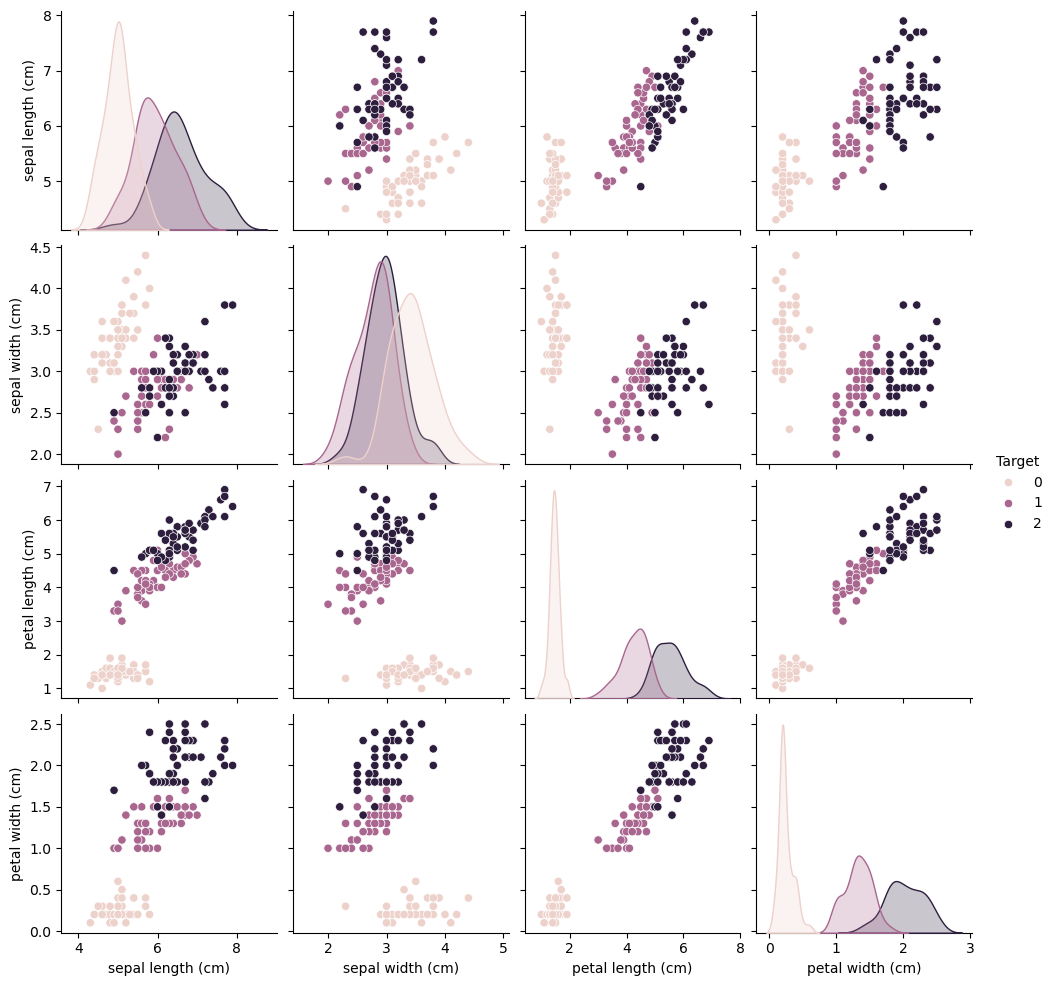

In [35]:
# sns.histplot(data = iris_df)
sns.pairplot(data = iris_df, hue = 'Target')
plt.show()

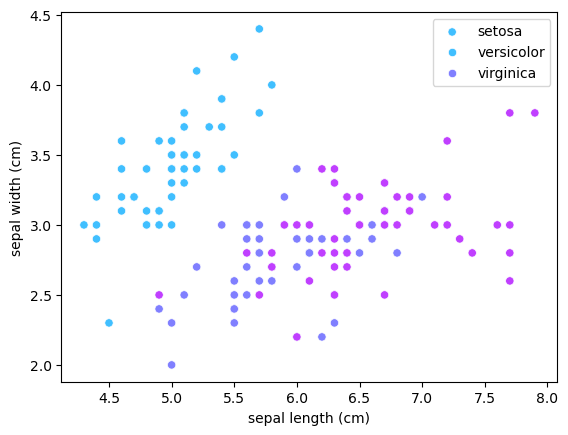

In [36]:
sns.scatterplot(data = iris_df, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'Target',palette=sns.color_palette('cool',3))
plt.legend(iris_target_names)
plt.show()

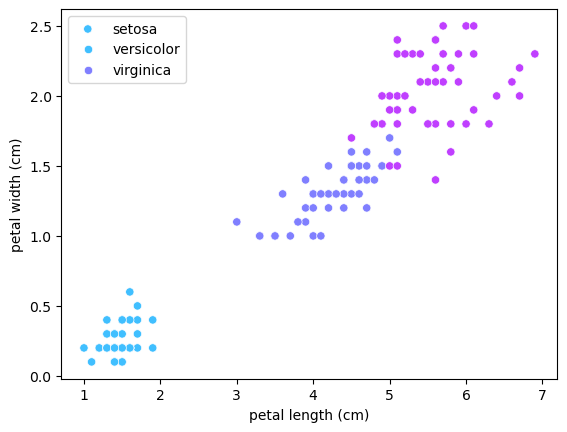

In [37]:
sns.scatterplot(data = iris_df, x = 'petal length (cm)', y = 'petal width (cm)', hue = 'Target',palette=sns.color_palette('cool',3))
plt.legend(iris_target_names)
plt.show()

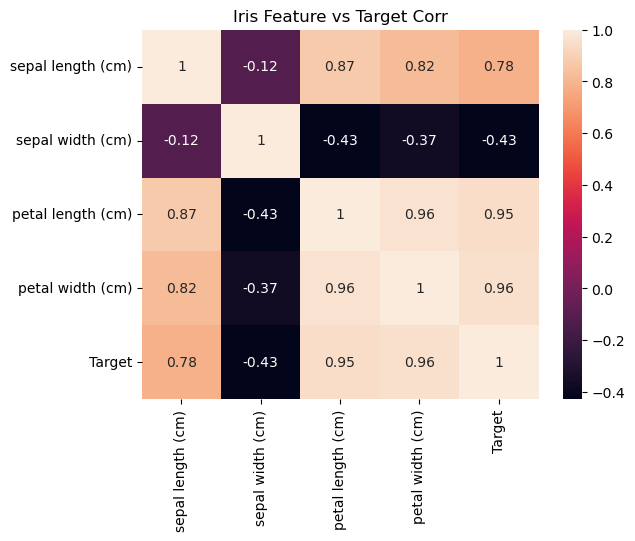

In [38]:
plt.title('Iris Feature vs Target Corr')
sns.heatmap(iris_df.corr(),annot = True)
plt.show()

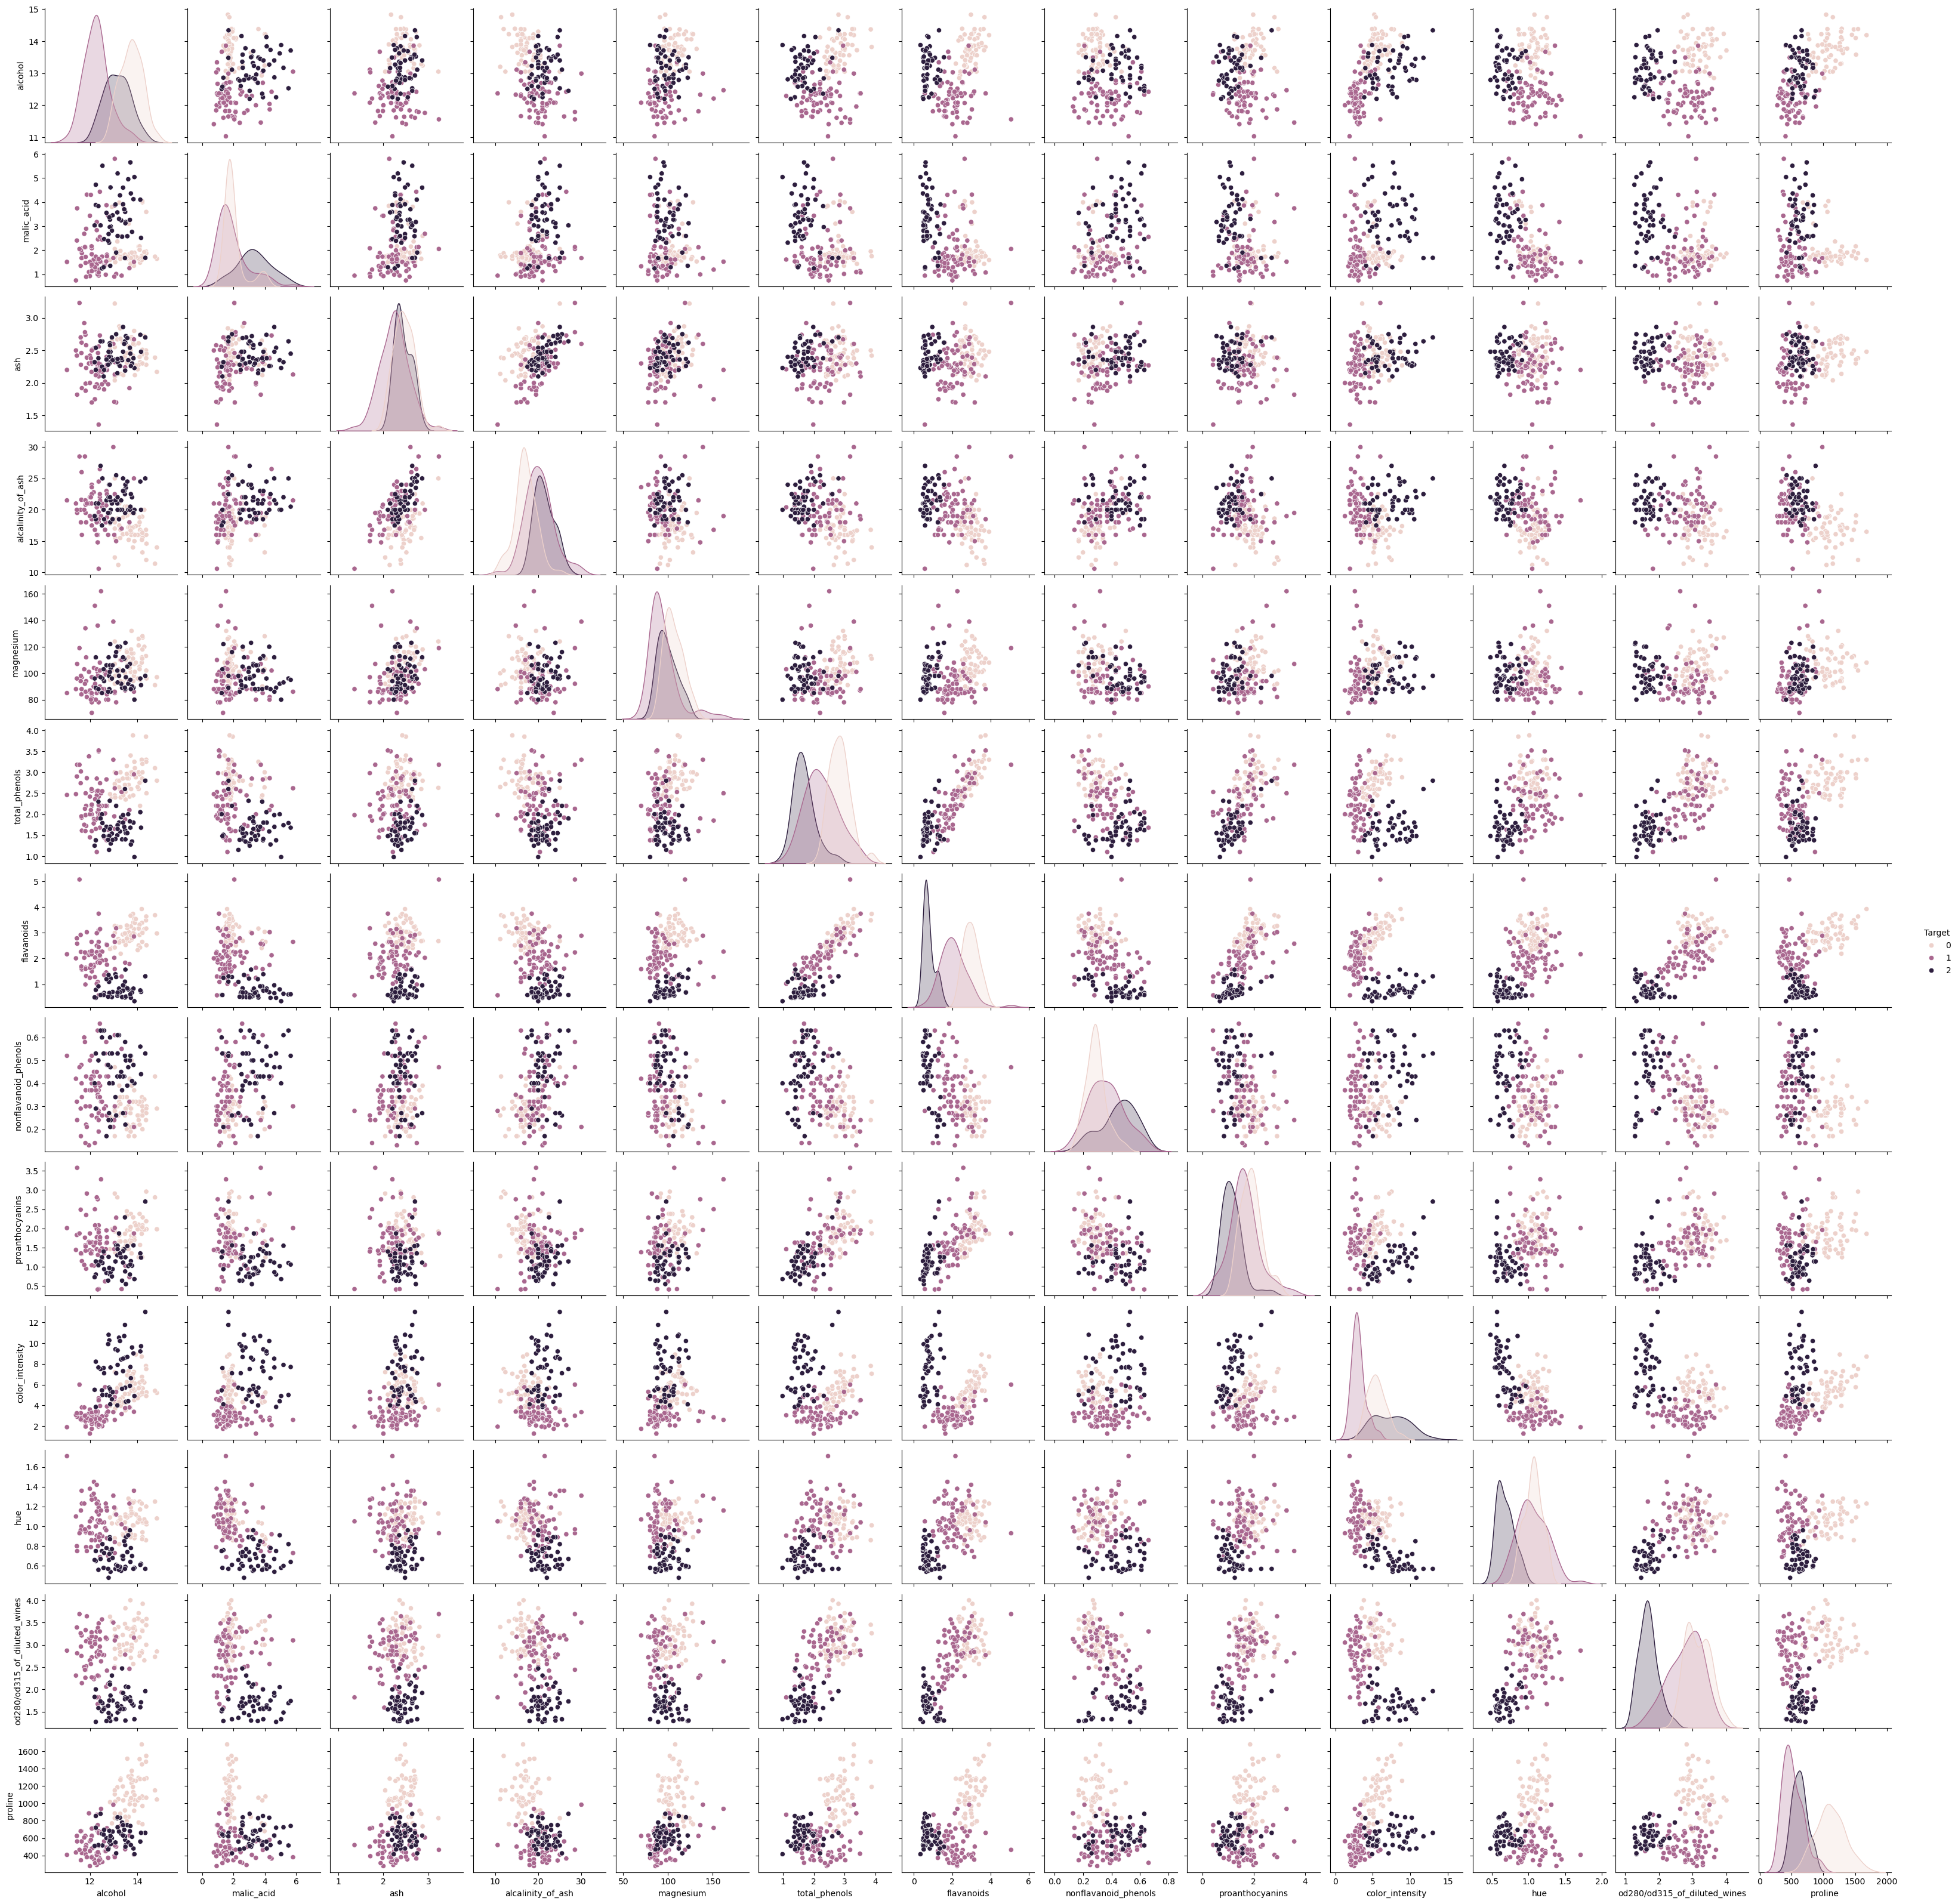

In [39]:
# sns.histplot(data = iris_df)
sns.pairplot(data = wine_df, hue = 'Target')
plt.show()

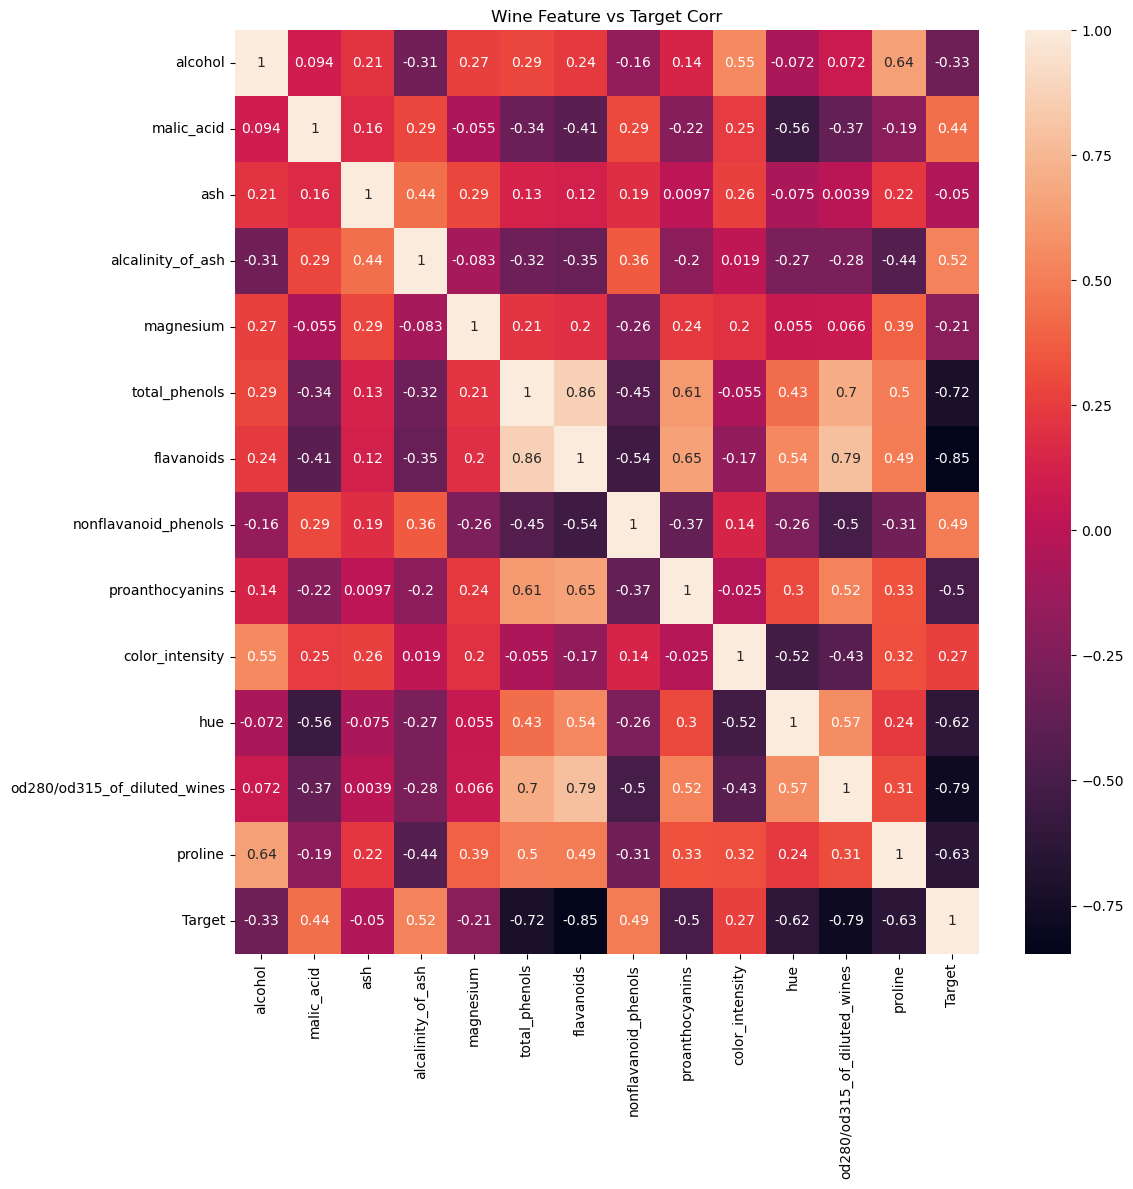

In [40]:
plt.figure(figsize=(12,12))
plt.title('Wine Feature vs Target Corr')
sns.heatmap(wine_df.corr(),annot = True)
plt.show()

In [41]:
df_tennis.sample(5)

outlook  temp humidity  windy play
4     rainy  cool   normal  False  yes
6  overcast  cool   normal   True  yes
1     sunny   hot     high   True   no
8     sunny  cool   normal  False  yes
2  overcast   hot     high  False  yes

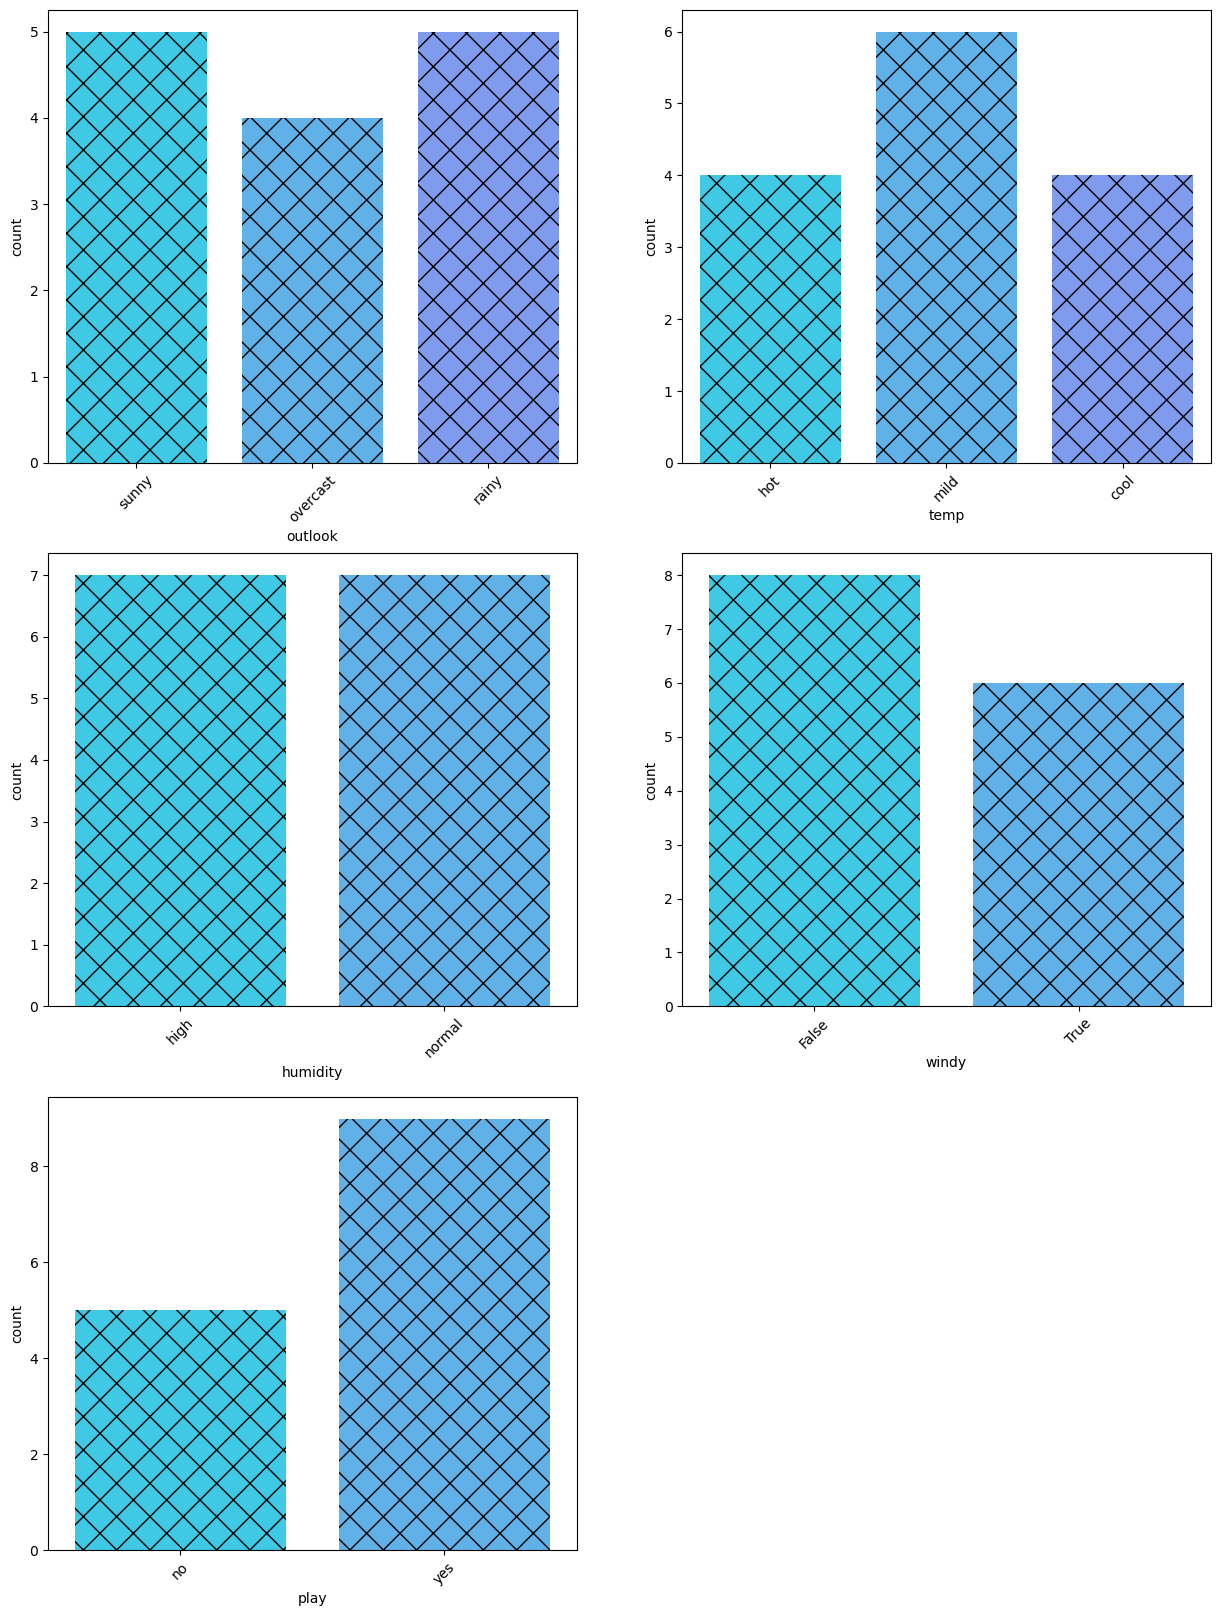

In [42]:
plt.figure(figsize=(15,20))
for i,j in enumerate(df_tennis.columns):
    plt.subplot(3,2,i+1)
    sns.countplot(data = df_tennis, x= j,palette=sns.color_palette('cool'),hatch = 'x')
    plt.xticks(rotation = 45)
plt.show()

# Step 5:Feature Engineering
- Text to Num

In [44]:
df_tennis_new = pd.get_dummies(df_tennis,drop_first=True,dtype = int)

In [45]:
df_tennis_new['windy'] = df_tennis_new['windy'].apply(lambda row: int(row))

In [46]:
df_tennis_new 

windy  outlook_rainy  outlook_sunny  temp_hot  temp_mild  humidity_normal  \
0       0              0              1         1          0                0   
1       1              0              1         1          0                0   
2       0              0              0         1          0                0   
3       0              1              0         0          1                0   
4       0              1              0         0          0                1   
5       1              1              0         0          0                1   
6       1              0              0         0          0                1   
7       0              0              1         0          1                0   
8       0              0              1         0          0                1   
9       0              1              0         0          1                1   
10      1              0              1         0          1                1   
11      1              0              0         0          1                0   
12      0              0              0         1          0                1   
13      1              1              0         0          1                0   

    play_yes  
0          0  
1          0  
2          1  
3          1  
4          1  
5          0  
6          1  
7          0  
8          1  
9          1  
10         1  
11         1  
12         1  
13         0

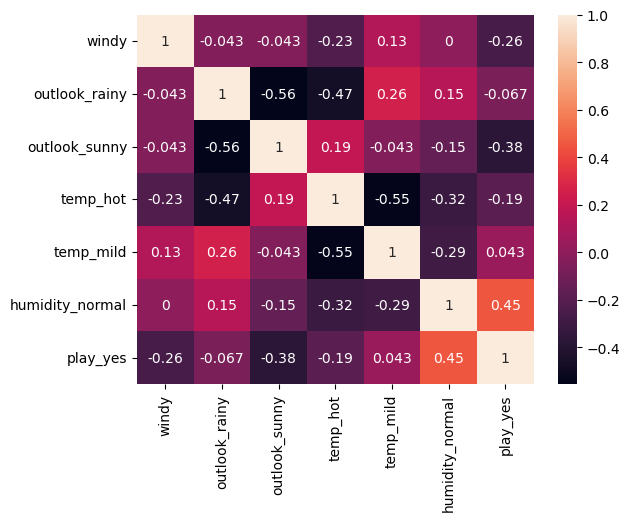

In [47]:
sns.heatmap(df_tennis_new.corr(),annot = True)
plt.show()

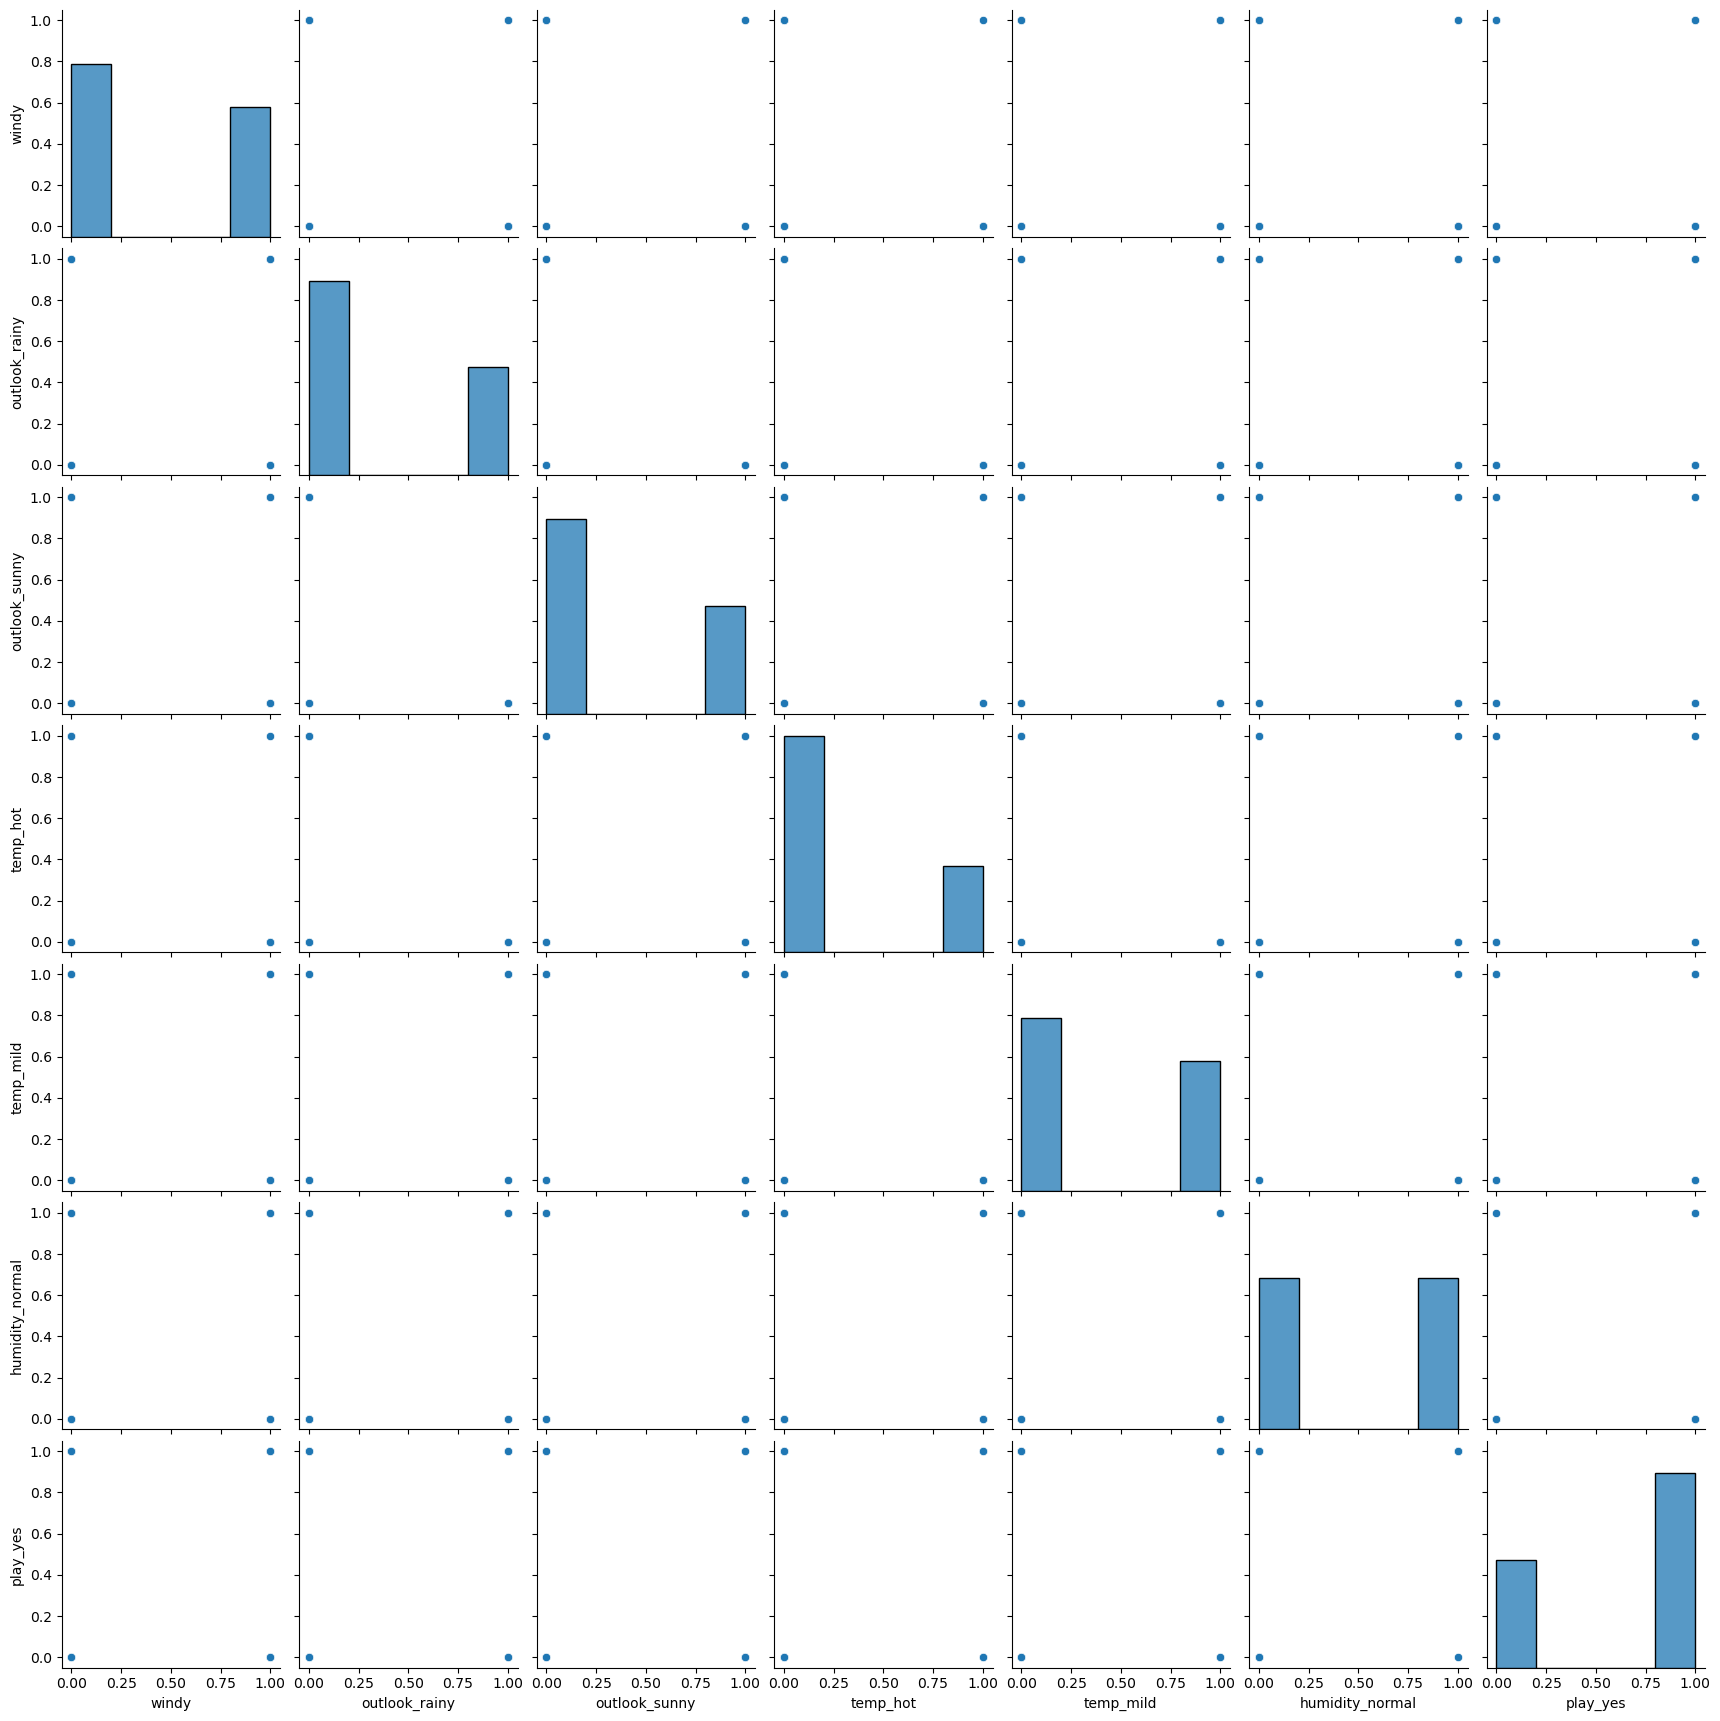

In [48]:
sns.pairplot(data =df_tennis_new)
plt.show()

# Step 6: Divide data into Feature and target, Train test Split, Model Building

In [50]:
all_df = [df_tennis_new, wine_df, iris_df]
all_df_name = ['df_tennis_new', 'wine_df', 'iris_df']

all_ml_model = [LogisticRegression, SVC, KNeighborsClassifier, GaussianNB, MultinomialNB, DecisionTreeClassifier, RandomForestClassifier]

all_ml_model_name = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'GaussianNB', 'MultinomialNB', 'DecisionTreeClassifier', 'RandomForestClassifier']

temp_dict = {'Project_name':[],'ML Model Name':[],'Each Model Score':[], 'Model Brain':[]}


for j,i in enumerate(all_df):
    X = i.iloc[:,:-1]
    y = i.iloc[:,-1]

    # train test 
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

    
    for k,ml_model in enumerate(all_ml_model):
        model = ml_model()
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        score = model.score(X_test,y_test)
        
        temp_dict['Project_name'].append(all_df_name[j])
        temp_dict['ML Model Name'].append(all_ml_model_name[k])
        temp_dict['Each Model Score'].append(score)
        temp_dict['Model Brain'].append(model)
all_model_matrix = pd.DataFrame(temp_dict)
all_model_matrix

Project_name           ML Model Name  Each Model Score  \
0   df_tennis_new      LogisticRegression          0.333333   
1   df_tennis_new                     SVC          0.666667   
2   df_tennis_new    KNeighborsClassifier          0.333333   
3   df_tennis_new              GaussianNB          0.333333   
4   df_tennis_new           MultinomialNB          0.333333   
5   df_tennis_new  DecisionTreeClassifier          0.666667   
6   df_tennis_new  RandomForestClassifier          0.333333   
7         wine_df      LogisticRegression          0.972222   
8         wine_df                     SVC          0.805556   
9         wine_df    KNeighborsClassifier          0.722222   
10        wine_df              GaussianNB          1.000000   
11        wine_df           MultinomialNB          0.888889   
12        wine_df  DecisionTreeClassifier          0.944444   
13        wine_df  RandomForestClassifier          1.000000   
14        iris_df      LogisticRegression          1.000000   
15        iris_df                     SVC          1.000000   
16        iris_df    KNeighborsClassifier          1.000000   
17        iris_df              GaussianNB          1.000000   
18        iris_df           MultinomialNB          0.900000   
19        iris_df  DecisionTreeClassifier          1.000000   
20        iris_df  RandomForestClassifier          1.000000   

                                          Model Brain  
0                                LogisticRegression()  
1                                               SVC()  
2                              KNeighborsClassifier()  
3                                        GaussianNB()  
4                                     MultinomialNB()  
5                            DecisionTreeClassifier()  
6   (DecisionTreeClassifier(max_features='sqrt', r...  
7                                LogisticRegression()  
8                                               SVC()  
9                              KNeighborsClassifier()  
10                                       GaussianNB()  
11                                    MultinomialNB()  
12                           DecisionTreeClassifier()  
13  (DecisionTreeClassifier(max_features='sqrt', r...  
14                               LogisticRegression()  
15                                              SVC()  
16                             KNeighborsClassifier()  
17                                       GaussianNB()  
18                                    MultinomialNB()  
19                           DecisionTreeClassifier()  
20  (DecisionTreeClassifier(max_features='sqrt', r...

In [51]:
final_ml_matrix = all_model_matrix.sort_values(by = ['Project_name','Each Model Score'],ascending = False).groupby('Project_name').head(1)

In [52]:
final_ml_matrix

Project_name       ML Model Name  Each Model Score           Model Brain
10        wine_df          GaussianNB          1.000000          GaussianNB()
14        iris_df  LogisticRegression          1.000000  LogisticRegression()
1   df_tennis_new                 SVC          0.666667                 SVC()

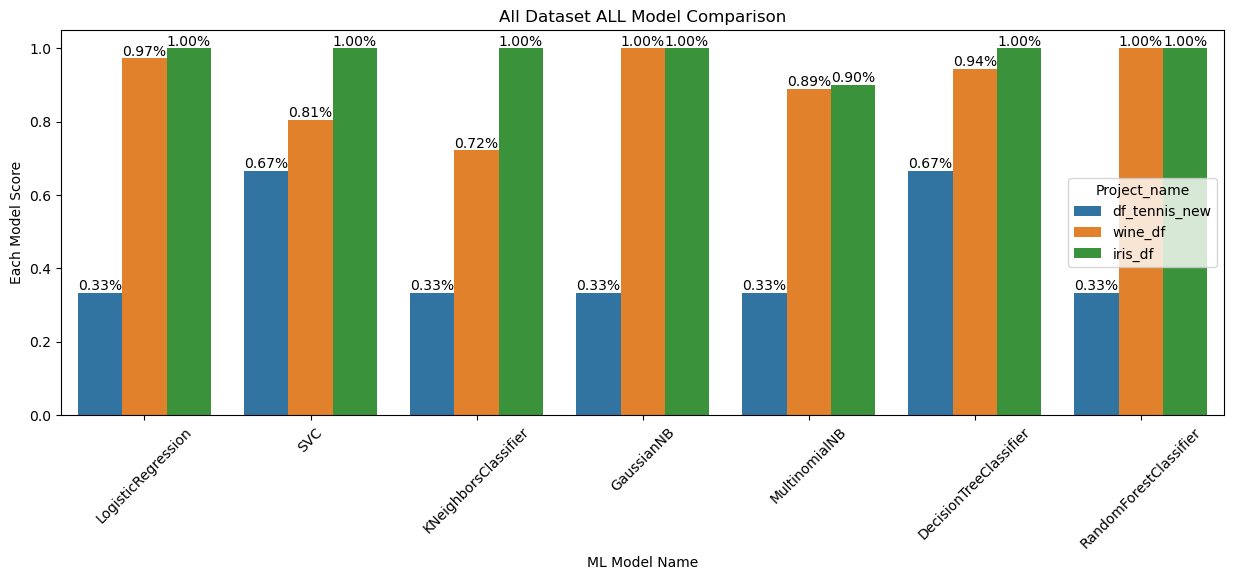

In [53]:
plt.figure(figsize=(15,5))
plt.title('All Dataset ALL Model Comparison')
ax = sns.barplot(data = all_model_matrix, x= 'ML Model Name', y = 'Each Model Score', hue = 'Project_name')
for i in ax.containers:
    plt.bar_label(i,fmt = '%.2f%%')
plt.xticks(rotation = 45)
plt.show()

# Step 7: Model Save: using pickle, joblib

In [113]:
wine_model = final_ml_matrix['Model Brain'].values[0]

In [115]:
with open('wine_model_brain.pkl','wb') as f:
    pickle.dump(wine_model,f)
print('Done')

Done


In [163]:
for i in final_ml_matrix[['Project_name','Model Brain']].itertuples():
    index,name,brain = tuple(i)
    cleaned_name = name.replace('df','').replace('_','').replace('new','')
    # print(cleaned_name)
    with open(f'{cleaned_name}_ml_brain.pkl','wb') as f:
        pickle.dump(brain,f)
print('Best ML Model Saved Successfully!!')

Best ML Model Saved Successfully!!


In [173]:
sample_X = iris_df.sample().iloc[:,:-1].values
with open('iris_ml_brain.pkl','rb') as f:
    iris_chatgpt = pickle.load(f)

In [247]:
# print(iris_target_names)
sample_data = iris_df.sample()
sample_X = sample_data.iloc[:,:-1]
sample_y = sample_data.iloc[:,-1]
print(sample_X.values,iris_target_names[sample_y])
print("Model says:", iris_target_names[iris_chatgpt.predict(sample_X)[0]])

[[5.2 4.1 1.5 0.1]] ['setosa']
Model says: setosa


In [250]:
# Small to medium to big level web framework: we will use Streamlit
# Python based light web frame work

In [252]:
os.getcwd()

'C:\\Users\\salma\\Complete STP'

In [254]:
import streamlit as st

In [260]:
df_tennis.to_csv('tennis',index = False)

In [262]:
wine_df.to_csv('wine',index = False)

In [264]:
iris_df.to_csv('iris',index = False)

In [270]:
for i in iris_df.iloc[:,:-1]:
    min_f, max_f = iris_df[i].agg(['min','max'])
    min_f, max_f = int(min_f), int(max_f)
    print(i,min_f,max_f)

sepal length (cm) 4 7
sepal width (cm) 2 4
petal length (cm) 1 6
petal width (cm) 0 2


In [315]:
str(iris_df['sepal length (cm)'].agg(['min','max']).dtype) == 'object'

False

In [311]:
str(iris_df['petal length (cm)'].agg(['min','max']).dtype)

'float64'